# Take home exam

Machine Learning for Finance  
VU Amsterdam    
  

<img src="https://www.vu.nl/en/Images/VUlogo_Wit_RGB_mettekst_tcm270-835563.svg" width="200" style="position:absolute; top:0; right:20px"/>

----

In this exam is divided into two sections. Part I is about applying machine learning methods to examine stock returns in various ways. Each question has a technical part (e.g. data-processing, model fitting) and a comprehension part (e.g. explaining your choices, discussing results). While the technical parts are necessary, we value the comprehension part more. Part II is about your general understanding of machine learning, what pitfalls there are and what the challenges machine learning applications may face in the real world. 


**Expectations and general advice**
* Ensure that your notebook runs error-free.
* Only present the necessary code and results.
* Keep your discussions and explanations short and to the point. Very long answers usually hurt more than they help.
* Present visualizations when they are asked for. If you want to include more, make sure they add to your answer.
* All data needed is contained in the `data` folder. 
* Relevant literature is contained in `literature`. It's useful to refer to them but you are not expected to incorporate them into your answers.

<div style='text-align: center; font-weight: bold; padding-top:30px;'>Good luck!</div>

----

<div style="font-size:250%; line-height:120%; padding: 50px 0 20px 0; border-bottom: 4px solid black;">
    Part I: Putting machine learning to use
</div>

# Question 1 [10P]

Load the following data files
* `company.csv` (in `company.zip`, you can unzip it manually beforehand) and call it `df_features`.
Column 1 (`permno`) is the unique company identifier.  
Column 2 (`date`) is the unique date identifier.  
Column 3-95 are the 93 lagged firm characteristics.  

We will refer to these as $X_{it}$. For more information, have a look at Green, Hand, Zhang (2017), in the literature folder.

* `selected-returns.csv` and call it `df_returns`  
Column 1 (`permno`) is the unique company identifier.  
Column 2 (`date`) is the unique date identifier.  
Column 3 (`RET`) is the [Holding Period Return](https://wrds-web.wharton.upenn.edu/wrds/query_forms/variable_documentation.cfm?vendorCode=CRSP&libraryCode=crspa&fileCode=msf&id=ret)  

We will refer to these as $r_{it}$  

The main question you need to answer is: Which companies do you use?
Several factors will determine your decision. 

* You'll notice, that there are many more companies in `df_features` than in `df_returns`. 
* Avoid dropping characteristics from `df_features` and try to use as many as possible. 

Keep in mind that your selection determines the remainder of the programming questions. 

----

**a)**
First focus on `df_returns`. Give a graphical overview of how many company returns are available (=not missing) over time. Which companies do you decide for? Does your choice induce any biases?

**b)**
Next, make yourself familiar with `df_features`. Replace the missing values of a variable with its cross-sectional median. That is, for each variable and at each point in time, replace missing values with the median of available values. 

**c)**
Select those companies and dates that are available in both `df_returns` and `df_features`. 

----

**Hints**  
There are several ways for you to solve this question. Using loops or other methods you come with is perfectly fine. However, it does pay to look at the following pandas functions in more detail. 
* `pd.set_index()`
* `pd.groupby()`
* `pd.stack()` and `pd.unstack()`
* `pd.isna()` and `pd.notna()`
* `pd.resample()` (could be relevant for Question 5...)

<div style="color:blue; border-bottom: 7px solid rgba(0,0,255,.3); line-height:36pt; font-size:185.7%; font-weight:bold; padding-left:.3em;">Answer</div>

In [1]:
# Importing the relevant data analysis libraries
import pandas as pd 
import numpy as np 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
plt.style.use("seaborn")
import os

#Importing the data
path_f = os.path.join("data","company.csv")
path_r=os.path.join("data", "selected-returns.csv")

#defining both dataframes 
df_features=pd.read_csv(path_f,parse_dates=["date"])
df_returns=pd.read_csv(path_r, parse_dates=["date"])

# a)



In [2]:
df_returns.info() #Data seems to be presented in the correct format and balanced 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26600 entries, 0 to 26599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   permno  26600 non-null  int64         
 1   date    26600 non-null  datetime64[ns]
 2   RET     26600 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 623.6 KB


In [3]:
df_returns.permno.nunique() #345 companies registered in this dataset

345

In [4]:
df_features.permno.nunique() #Huge difference in companies

1027

In [5]:
df_features.head(2)

,permno,date,mvel1,beta,betasq,chmom,dolvol,idiovol,indmom,mom1m,...,stdacc,stdcf,ms,baspread,ill,maxret,retvol,std_dolvol,std_turn,zerotrade
0,10080,2000-01-31,2868.0,-0.073811,0.020791,-0.097727,3.065142,0.068324,-0.097056,-0.020408,...,NaN,NaN,NaN,0.051729,0.000017,0.136364,0.042418,1.382123,2.053254,13.363636
1,10080,2000-02-29,4541.0,-0.081841,0.017610,0.483402,6.348264,0.068271,0.002209,0.583333,...,NaN,NaN,NaN,0.181881,0.000014,0.444444,0.127924,1.801642,24.497492,8.400000


In [5]:
print(len(df_returns.date.value_counts()))#120 Monthly observations (10 years )

120


In [6]:
#Creating a subset of the data. Grouping all different observations by company ID and counting, for each of the identifiers,
#the amount of RET observations
sr_Ident=(df_returns.groupby(by="permno").count().RET)
sr_Ident.head(10)

permno
10080     46
10087      9
10149     30
10205    120
10253     68
10258    120
10318    120
10353    120
10606    120
10926     83
Name: RET, dtype: int64

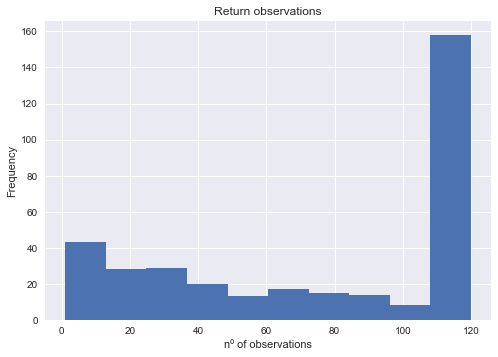

In [7]:
#Plotting the histogram. 
plt.hist(sr_Ident)
plt.ylabel ("Frequency")
plt.xlabel ("nº of observations")
plt.title("Return observations");

From the histogram one could see that most of the 345 companies, nearly half of them, have at least 120 observations. However, there are also several of them with quite few observations (0-20). For instance, from the printed output of the series "Sr_Ident" we see that for company 10087 there are just 9/120 available observations. This means that this particular company is missing  92.5% of the total observations. In my case I´ll include just those companies missing at most 90% of the observations, that is, companies with >= 12/120 observations. Since I consider dropping more would induce a too high selection bias, since we are erasing the randomization of the sample through the selective picking of certain companies and the dynamics of companies with lesser observations wouldn´t be represented or accounted for in the models.

In [8]:
#Defining a serie with permnos of companies with more than 96 observations
sr_permnos = df_returns.groupby('permno').count()[df_returns.groupby('permno').count().RET >= 12].index

#Dropping companies with less than 12 observations
df_returns = df_returns[df_returns.permno.isin(sr_permnos) == True]


# b)


In [9]:
df_features.isna().sum() #Checking how many missing value each of the features has

permno           0
date             0
mvel1           20
beta          6262
betasq        6262
              ... 
maxret           3
retvol          45
std_dolvol      96
std_turn        20
zerotrade       27
Length: 95, dtype: int64

In [10]:
#Importing imputer data imputer in order to complete missing observations
from sklearn.impute import SimpleImputer

#Defining the imputer class. 
#From the sklearn documentation "replace missing values using the median along each column."
imp_median = SimpleImputer( missing_values=np.nan, strategy='median') 

#Fitting, and then transforming, the class to the data. The selection goes for all rows and for columns
#ranging from mvel1 until the last column zerotrade. That is, for 93/95 of the features (excl. permno & date) 
df_features.loc[:,"mvel1":"zerotrade"]=imp_median.fit_transform(df_features.loc[:,"mvel1":"zerotrade"])
df_features.head(3)

,permno,date,mvel1,beta,betasq,chmom,dolvol,idiovol,indmom,mom1m,...,stdacc,stdcf,ms,baspread,ill,maxret,retvol,std_dolvol,std_turn,zerotrade
0,10080,2000-01-31,2868.0,-0.073811,0.020791,-0.097727,3.065142,0.068324,-0.097056,-0.020408,...,0.143748,0.171573,4.0,0.051729,0.000017,0.136364,0.042418,1.382123,2.053254,13.363636
1,10080,2000-02-29,4541.0,-0.081841,0.017610,0.483402,6.348264,0.068271,0.002209,0.583333,...,0.143748,0.171573,4.0,0.181881,0.000014,0.444444,0.127924,1.801642,24.497492,8.400000
2,10080,2000-03-31,3107.0,0.104741,0.010971,-0.018970,8.959376,0.076380,0.147039,-0.315789,...,0.143748,0.171573,4.0,0.106763,0.000024,0.217391,0.095731,1.007548,2.234800,3.150000


# c)



In [11]:
#Merged the dataframes based on permno. Using the arg "inner" so it merges only on those variables or features shared
#by both DF, avoiding duplicates when presenting the resulting DF
df_features=pd.merge(df_features,df_returns, how="inner") 
#Checking the amount of companies listed in the new set 
df_features.permno.nunique()

304

# Question 2 [15P]

In this question we ask: What determines the differences between average stock returns? This perspective implies that we do not care much about the time-variation. If this were a linear regression model, you would estimate
$$
r_i = X_i \beta + e_i
$$
Instead, we fit a `Ridge` regression that shrinks the cross sectional coefficients $\beta$ towards zero. How strong the shrinkage is depends on the hyperparameter `alpha`.

**a)**
Compute the average stock return $r_i = \frac{1}{T} \sum_t r_{it}$ and average features $X_i = \frac{1}{T} \sum_t X_{it}$ of each company over the entire sample.

**b)**
Select a cross validator and the number of folds that you deem appropriate for this task. Briefly explain your choice. You will only use this cross validator for Part I.

**c)**
Choose 20 values for `alpha` (e.g. using `np.linspace` or `np.logspace`). Then, use the `cross_validate` function to calculate the average test score (i.e. the score calculated on the test sample) of all cross validation folds for each `alpha`. Do this exercise once with 
* `cross_validate(..., scoring='neg_root_mean_squared_error', ...)` and with 
* `cross_validate(..., scoring='neg_median_absolute_error', ...)`. 

At the end of this subquestion, you should have two series, `sr_rmse_ridge` and `sr_mae_ridge`. Each series should have the 20 alpha values as the index and the corresponding average test scores as values. Plot these two series in a single graph.

**d)**
Discuss how the two series differ and why you think that is the case. If they do not differ, discuss why your results are insensitive to different scoring methods. Decide for one of the two scoring methods.

<div style="color:blue; border-bottom: 7px solid rgba(0,0,255,.3); line-height:36pt; font-size:185.7%; font-weight:bold; padding-left:.3em;">Answer</div>

# a)


In [12]:
#Keeping in mind the previous merging process of the data:
# Computing the average stock return per company and defining the target variable (y) as that average return
return_mean=df_features.groupby(by="permno").RET.mean()
sr_target=pd.Series(return_mean)
sr_target.shape

(304,)

In [13]:
#Computing the average feature value per company
features_mean=df_features.groupby(by="permno").mean()
df_features=features_mean.drop("RET",axis=1)
df_features.shape

(304, 93)

# b)


In [14]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

nb_folds = 5

Since the target variable doesn´t have a binary output (or multiclass) I have chosen Kfold as cross-validator. The cross validation in this case will take (k-1) folds (4) to predict the output of the spare fold. This means that 20% of the data is used for testing, this is usually pretty accurate for the case at hand. Due to the size of the data (304 observations from different companies) using 5 folds seems reasonable. Since, setting a larger amount of folds is often the case for datasets containing larger amount of observations.

Note however that in order to tune the hyperparameters I used GridSearchCV. By default, if cv is an integer, Gridsearch would use KFold or StratifiedKFold depending on the data set. For the case at hand, since an integer is passed, GridSearchCV uses as default the KFold cross-validator, and as mentioned before, since in this case the target variable isn´t a binary output, in which case StratifiedKFold would be used. 

# c)

In [15]:
# Defining 20 values of alpha
alphas=np.linspace(0,1,21)[1:].round(3)
alphas

array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55,
       0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

In [16]:
X=df_features.values
y=sr_target.values


#GridSearchCV uses Dictionary with parameters names (str) as keys and lists of parameter settings to try as values. 
#This enables searching over any sequence of parameter settings.
Hyper_parameters={"alpha":[0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55,
       0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1. ]}

#Creating the class for the ridge regression
mdl_ridge=Ridge(alpha=Hyper_parameters)

#Cross validating using GridSearch
Cross=GridSearchCV(mdl_ridge,Hyper_parameters,scoring="neg_root_mean_squared_error",cv=nb_folds,return_train_score=False) 
Cross.fit(X,y);

#Creating a DataFrame out of the results of the cross validation performed. If printed such DF it is kind of a score report
results_mse=pd.DataFrame(Cross.cv_results_)
#Out of that DF, I create a pd.Series containing both columns including the alphas and the..........
results_mse_2=results_mse[["param_alpha","mean_test_score"]]
results_mse_2.set_index("param_alpha",inplace=True)
sr_rmse_ridge=pd.Series(results_mse_2.mean_test_score);

C:\Users\Pedro Romero\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.33093e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\Pedro Romero\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.16278e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\Pedro Romero\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.61167e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\Pedro Romero\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.17286e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\Pedro Romero\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.848

In [17]:
#These are the best combination of parameter-score obtained
print("The best parameter selected is","",Cross.best_params_)
print("The score of this parameter using the defined metrics is","",Cross.best_score_)

The best parameter selected is  {'alpha': 0.05}
The score of this parameter using the defined metrics is  -0.027972537416097388


In [18]:
#Similar to the previous CV, but in this case computing a different scoring metrics.

Cross_2=GridSearchCV(mdl_ridge,Hyper_parameters,scoring="neg_median_absolute_error",cv=nb_folds,return_train_score=False)
Cross_2.fit(X,y);

#Results DF
mae_df=pd.DataFrame(Cross_2.cv_results_)

#Sr_mae 
results_mae_2=mae_df[["param_alpha","mean_test_score"]]
results_mae_2.set_index("param_alpha",inplace=True)
sr_mae_ridge=pd.Series(results_mae_2.mean_test_score)

C:\Users\Pedro Romero\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.33093e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\Pedro Romero\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.16278e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\Pedro Romero\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.61167e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\Pedro Romero\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.17286e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\Pedro Romero\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.848

In [19]:
print("The best parameter selected is","",Cross_2.best_params_)
print("The score of this parameter using the defined metrics is","",Cross_2.best_score_)

The best parameter selected is  {'alpha': 0.05}
The score of this parameter using the defined metrics is  -0.009141324225561707


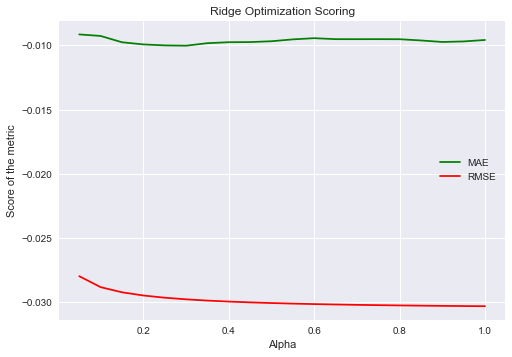

In [37]:
fig, ax = plt.subplots()
ax.plot(sr_mae_ridge,color='green',label="MAE")
ax.plot(sr_rmse_ridge,color='red',label="RMSE")
ax.set_title("Ridge Optimization Scoring")
ax.set_xlabel('Alpha')
ax.set_ylabel('Score of the metric')
ax.legend();
plt.savefig("Mae_Mse.png")

# d)

The optimization of the loss function in regression and prediction problems is based in minimising the residuals or errors.Thus, when employing scoring methods based on errors, the lower the score the better. Actually, from the proper code source for instance the rmse:

> neg_root_mean_squared_error_scorer = make_scorer(mean_squared_error,
                                                             greater_is_better=False,
                                                             squared=False)
                                                             
Both series differ considerably from each other. The graph simply presents the negated values of the residuals, this is, a negative "version" of the true computed error.The error, in absolute terms, seems to be larger if considering the root mean squared error. This might be the case since the order of the operations conducted to compute the median absolute error doesn´t avoid cancellation of the terms, whereas if using the RMSE the distances from the mean are squared, inducing a positive sign. Therefore, by using the mae, some of the residuals might be shrinked to 0, bringing that error measure 0<=mae. Despite this, after having read a bit about it, it seems that the MAE as a measure of statistical dispersion is more resilient to outliers in a data set than the standard deviation, as the RMSE puts more weight in abnormal deviations, and thus, outliers exert a greater influence on it. 

Taking into account that the period considered includes the GFC (2008), when the presence of outliers is more the rule rather than the exception, I´ve decided to continue using the MAE to avoid outliers´ influence. 

# Question 3 [10P]

While the Ridge model shrinks coefficients towards zero, it rarely sets them to exactly zero. This is what the Lasso does, which is therefore suited for variable selection. In this question you determine which features are most relevant, according to the Lasso. 

**a)** 
Produce a similar graph as you did in the previous question using a `Lasso` model with the **one** scoring method you chose. You may have to adjust the 20 alphas before you calculate `sr_rmse_lasso` **or** `sr_mae_lasso`. 

**b)**
What is the optimal `alpha` parameter? Which features are most predictive if you use this `alpha`? Use a [bar plot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html) or [horizontal bar plot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.barh.html) to show the non-zero coefficients.

**c)**
Are these selected variables sensible? Briefly discuss your findings using **1 or 2 features** an investor might find interesting. It is not expected of you to discuss **all** selected features. Recall that you can find more information on the features in the paper Green, Hand, Zhang (2017) in the literature folder.

<div style="color:blue; border-bottom: 7px solid rgba(0,0,255,.3); line-height:36pt; font-size:185.7%; font-weight:bold; padding-left:.3em;">Answer</div>

# a)


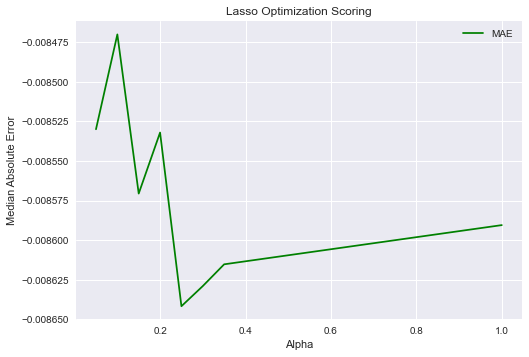

In [21]:
from sklearn.linear_model import Lasso
#Choosing the same grid of alpha parameters as with the Ridge Regression
alphas={"alpha":[0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55,
       0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.]}

Lasso_model=Lasso(alpha=alphas,fit_intercept=True)

Cross_3=GridSearchCV(Lasso_model,alphas,scoring="neg_median_absolute_error",cv=nb_folds,return_train_score=False)
Cross_3.fit(X,y)

#Defining the DataFrame with all the results, in this case for the Lasso
lasso_rmae_df=pd.DataFrame(Cross_3.cv_results_)

lasso_results_rmae_2=lasso_rmae_df[["param_alpha","mean_test_score"]]
lasso_results_rmae_2.set_index("param_alpha",inplace=True)
sr_rmae_lasso=pd.Series(lasso_results_rmae_2.mean_test_score)

#Plotting the results 
fig, ax = plt.subplots()
ax.plot(sr_rmae_lasso,color='green',label="MAE")
ax.set_title("Lasso Optimization Scoring")
ax.set_xlabel('Alpha')
ax.set_ylabel('Median Absolute Error')
ax.legend();

# b)



In [22]:
print("For the median absolute error the optimal value of alpha is","",Cross_3.best_params_)
print("The score if this alpha is used is","",Cross_3.best_score_)

For the median absolute error the optimal value of alpha is  {'alpha': 0.1}
The score if this alpha is used is  -0.008470155355419593


In [23]:
model=Lasso(alpha=0.1)
results=model.fit(X,y)
sr_coef = pd.Series(results.coef_, index=df_features.columns)

#Number of relevant parameters according to the model. These parameters make my model optimal in terms of 
#variance, however it creases the biases by all the number of observations dropped.
sum(sr_coef != 0) 

5

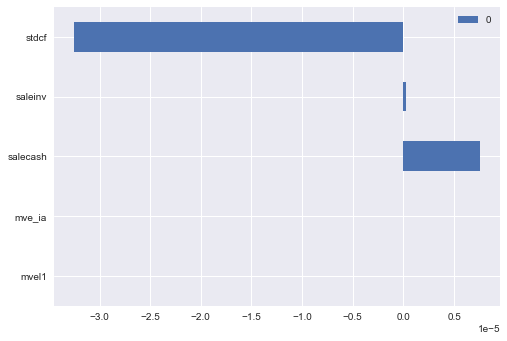

In [24]:
Lasso_Features=pd.DataFrame(sr_coef[sr_coef!=0])
Lasso_Features.plot.barh();

According to the graph, the most predictive features if using a 0.1 penalty are:
 - mvel1. Proxy of the company´s size, measuring the log of the market cap.
 - mve_ia. As a proxy of the specific company´s industry market capitalization.
 - Salecash. As proxy for the cash turnover ratio.
 - Saleinve. Proxy for inventory turnover.
 - Stdcf. Stdv of 16 quarters´ CF divided by the sales as proxy for the CFlows volatility

# c)


In [25]:
model1=Lasso(alpha=0.101)
results1=model1.fit(X,y)
sr_coef1 = pd.Series(results1.coef_, index=df_features.columns)

sum(sr_coef1 != 0)

4

I assume the sensitivity of this variables is determined by modifying the penalties imposed to the regression and seeing how the variables react. In this case, I´ve increased the penalty just by 0.001 to account for really small variations and see the true sensitivity of the variables. In this case, the result shows that "Saleinv" dropped, indicating a high sensitivity of the variable towards small variations in the penalties imposed. 

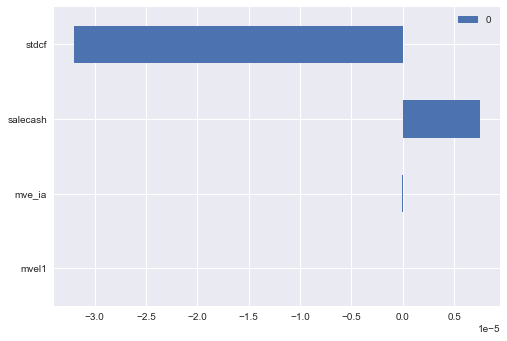

In [26]:
Lasso_Features=pd.DataFrame(sr_coef1[sr_coef1!=0])
Lasso_Features.plot.barh();

# Question 4 [15P]

The `RandomForestRegressor` is a powerful way to combine DecisionTrees in an ensemble approach. This combined method introduces several new hyperparameters, such as `n_estimators`, `max_depth`, `min_samples_leaf` (see [sklearn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) for the full list with descriptions). 

**a)**
Select two hyperparameters (**for example** `param1=max_features` and `param2=max_depth`) that you believe are worth conducting an [exhaustive grid search](https://scikit-learn.org/stable/modules/grid_search.html#grid-search) over. Describe which hyperparameters you picked and why you picked them. Also define a sensible grid size and resolution to conduct the gridsearch over.

**Hint**  
If the resolution is too coarse or the grid too small, you may not find the optimal value. If the grid is too fine or the grid too large, computation times may become too high. 

**Hint**  
Set the parameter `criterion` such that it is consistent with your cross validator scoring method.

**b)**
`RandomForestRegressor` has another parameter called `random_state`. How do you treat this hyperparameter? Do you leave the default value? Can you select it as either `param1` or `param2`?

**c)**
Conduct the grid search and use the same cross validation approach as for Ridge and Lasso. At the end you should have a DataFrame with `param` on its index, `param2` on its columns and contains the average test scores as values.   

To visualize your results, import the function `plot_heatmap` from `lib.plots`. To see how to use it, follow the example below or type in `help(plot_heatmap)`. If you have difficulties with the function, you can also choose another way to visualize your results.

```python
# make sure that the folder lib is in the same folder as this notebook!
from lib.plots import plot_heatmap

# generate some random data
df_example = pd.DataFrame(
    np.random.randn(24,20)**2,
)

# plot the heatmap
plot_heatmap(df_example)
```

**d)**
Discuss your results of the `RandomForestRegressor`. Does it perform better than `Ridge` or `Lasso`? Why or why not?

<div style="color:blue; border-bottom: 7px solid rgba(0,0,255,.3); line-height:36pt; font-size:185.7%; font-weight:bold; padding-left:.3em;">Answer</div>

# a)


In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler 
from lib.plots import plot_heatmap

X=df_features.values
y=sr_target.values

#Scaling the data to ensure same playing level field
scaler=StandardScaler().fit(X)
X=scaler.transform(X)

#######################
#############################
#Defining the hyperparameteres

#Contrary to decision trees, RandomForests classifiers do not suffer from overfitting since they take the average out of 
#all the predictions. Thus, although when using Dec.Trees classifiers it seems essential to limit the max_depth of the tree
# in this case I´ve decided not to limit the size of the trees in order to obtain the most pure leaves.

#Defining the max number of trees in the forest. A nice trait of RF is that it doesn´t overfit as we use more trees. 
#The way I see it is, the more trees, the stronger the consensus reached by those trees to choose good predictors. 
#However, the bigger the forest the more time it takes to compute the code. Thus, due to computational limitations 
#and after several trials and errors I´ve decided to limit the max size of the forest to 100 trees.
n_estimators = [int(x) for x in np.linspace(10, 100,10)]

#Determining the amount of samples present at each of the nodes. If 1, the different trees will grow in depth, fitting
#too much to the data. If more samples are passed, the decisions at each node wil be computed by the mean of the samples
#present
min_samples_leaf= [int(x) for x in np.linspace(1, 3,3)]


#The hyperparameter grid that will be used by GridSearchCV
param_grid = {'n_estimators': n_estimators,
               #'max_features': max_features,
             "min_samples_leaf":min_samples_leaf}


# b)

Before splitting the data we shuffle the data and we always keep the same randomly selected training and testing data. The main intuition to do so is to avoid for instance clusters of information or features with similar characteristics that might induce certain biases in the model, since it might learn those dynamics and wrongly. 

So no, the random_state parameter shouldn´t be exchanged by one of the already selected parameters, as this would be a "regular parameter" which cannot be automatically learned from the training data by the algo itself, but rather you select it. It would be more appropiate to say that, given certain selected hyperparamenters, always maintain the same randomness in train/test splits so the way the model fits and predicts given those parameters does not change.

In my case I decided to actually keep some randomness, so as sklearn leaves random_state=None by default, I´ve randomly selected a certain random_state.


# c)


Please note that the computation will take approximately 00:41.45 to be completed. I´ve tried to reduce it as much as I could narrowing it down until I got a meaningful result and at low computational cost. 

1   -0.002193
2   -0.002494
3   -0.002213
Name: 100, dtype: float64


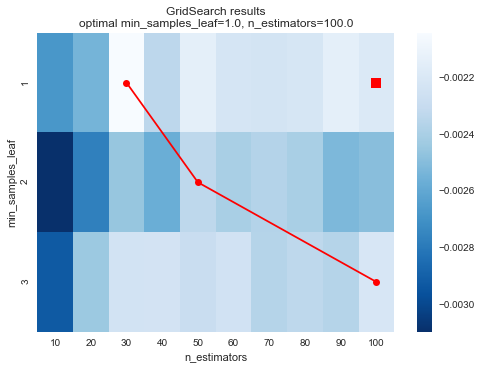

In [28]:
#Defining the class
mdl_rdm=RandomForestRegressor(random_state=1)
Cross_4=GridSearchCV(mdl_rdm,param_grid=param_grid,scoring="neg_median_absolute_error",
                     cv=nb_folds,return_train_score=False,
                    n_jobs=-1)
Cross_4.fit(X,y);

#Storing the results in a DF
rdm_rmae_df=pd.DataFrame(Cross_4.cv_results_)

#Creating an empy dataframe to store the selected values of the previous results´ DF
df_errors = pd.DataFrame(index=rdm_rmae_df.param_min_samples_leaf.unique(), columns=rdm_rmae_df.param_n_estimators.unique())
df_errors=df_errors.fillna(0)

#Appending the values of the selected metrics (the mean of it) to the empty DF
for i in range(len(rdm_rmae_df)):
    j=rdm_rmae_df.param_n_estimators[i]
    k=rdm_rmae_df.param_min_samples_leaf[i]
    df_errors.loc[k,j]=rdm_rmae_df.mean_test_score[i]
    
#Plotting the heatmap  
plot = plot_heatmap(df_errors,ylabel='min_samples_leaf', xlabel='n_estimators') 

# d)


According to my results and the metric selected,the Random Forest regressor does perform better than the Lasso & Ridge regressions when it comes to minimizing the variance measured with the mae. The min value that the Lasso Regression and Ridge yielded was -0.008470 & -0.009141 respectively, whereas from the heatmap one could observe that the Rdm Forest yields a significantly smaller error. 

# Question 5 [20P]

We now switch to an entirely different perspective. Before we tried to understand how firm characteristics explain the cross-sectional variation of returns. Now we try to forecast the returns of an equally-weighted stock index $I_t$ one period ahead. This stock index is the simple average of the returns you have selected before. 

$$
I_t = \frac{1}{N} \sum_i r_{it}
$$

To forecast $I_t$ we use the [25 Fama-French double-sorted portfolios](http://mba.tuck.dartmouth.edu/pages/faculty/ken.french/Data_Library/tw_5_ports.html). The underlying model is
$$
I_t = F_{t-1}\lambda + u_t
$$

where $F_t$ is are the values of the 25 Fama-French portfolios at time $t$. The vector $\lambda$ has 25 coefficients. 

**a)**
In order to forecast, you could simply estimate the model above using OLS. Why is that not a good idea if the ultimate goal is forecasting? Why is it better to use `Ridge`, `Lasso` or an `RandomForestRegressor`?

**b)** 
Compute the stock index $I_t$ and call it `sr_index`. Load the following predictors 
* `25_Portfolios_5x5.csv`
* `10_Industry_Portfolios.csv`
* `F-F_Momentum_Factor.csv`
* `F-F_Research_Data_5_Factors_2x3.csv`

and store the contents in a dataframe `df_predictors`. These are end-of-month values and have to be lagged by one month.

**c)**
Produce three graphs. The first graph should be comparable to the `Lasso` graph in Question 2c. The second graph should be comparable to the `Ridge` graph in Question 3a. Third, plot a heatmap for this forecasting problem using `RandomForestRegressor`, comparable to Question 4. Do you keep the same cross validator as before?

**d)**
Discuss your results of the `RandomForestRegressor`. Does it perform better than `Ridge` or `Lasso` for this forecasting problem? Why or why not?

**e)**
Are the heatmaps from Question 4 and 5c different from each other? Are they comparable or entirely different? Explain your findings.

<div style="color:blue; border-bottom: 7px solid rgba(0,0,255,.3); line-height:36pt; font-size:185.7%; font-weight:bold; padding-left:.3em;">Answer</div>

# a)


Using a traditional OLS approach to model and forecast the stock index returns wouldn´t be appropiate since in the set provided there are several variables highly correlated with each other. If the assumption regarding multicollinearity (namely, regressors aren´t completly orthogonal to each other) the inference of the regressions is meaningless since it becomes harder to disentangle the real effect of each of the regressors over the target variable. 

Thus, it will be better to use such models establishing penalties basically to filter the features/predictors that trully add predicting power to the regressions. So we are basically finding a new fitted line that best explains the data, with a low variance (errors), at the cost of introducing a bit of bias into the model and by dropping some of the features that the model considers as redundant, or that do not add much in our predictions.

# b)

In [29]:
df_features=pd.read_csv(path_f,parse_dates=["date"])

df_features=pd.merge(df_features,df_returns)
df_features["date"]=pd.to_datetime(df_features.date,format="%Y-%m-%d")

#The original df was built with monthly observations, for each of the companies.
#Therefore, I groupped the whole data by months and calculated the average of all the companies´ returns in that month
index=df_features.groupby(by="date").mean()
sr_index=pd.Series(index.RET)

#Generating the paths for each of the datasets
path_2=os.path.join("data","25_Portfolios_5x5.csv") 
Ptfolios=pd.read_csv(path_2)
path_3=os.path.join("data","10_Industry_Portfolios.csv")
Industry_Ptfolios=pd.read_csv(path_3)
path_4=os.path.join("data","F-F_Momentum_Factor.csv")
Momentum=pd.read_csv(path_4)
path_5=os.path.join("data","F-F_Research_Data_5_Factors_2x3.csv")
Five_FF=pd.read_csv(path_5)

#Creating a new dataframe with all of the datasets
merge1=pd.merge(Ptfolios,Industry_Ptfolios)
merge2=pd.merge(merge1,Momentum)
merge3=pd.merge(merge2,Five_FF)
df_predictors=merge3
df_predictors.head(2)

# Changing the first column into date
df_predictors["date"]=df_predictors["Unnamed: 0"]
df_predictors.drop('Unnamed: 0',axis=1,inplace=True)

#Selecting the correct dates 
first_date_filter=df_predictors.date>=200001
df_predictors=df_predictors[first_date_filter]
second_date_filter=df_predictors.date<=200912
df_predictors=df_predictors[second_date_filter]

df_predictors=df_predictors.drop("date",axis=1)



#Setting the target and predictors 
X=np.array(df_predictors)
y=np.array(sr_index)

# c)

# Ridge

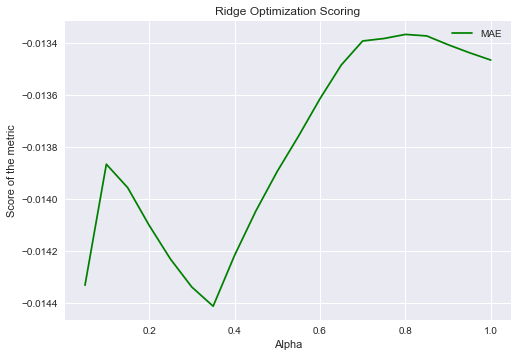

In [30]:
alphas={"alpha":[0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55,
       0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.]}

Cross_5=GridSearchCV(mdl_ridge,alphas,scoring="neg_median_absolute_error",cv=nb_folds,return_train_score=False)
Cross_5.fit(X,y);

#Results DF
mae_df=pd.DataFrame(Cross_5.cv_results_)

#Sr_mae 
results_mae_rid_2=mae_df[["param_alpha","mean_test_score"]]
results_mae_rid_2.set_index("param_alpha",inplace=True)
sr_mae_ridge_2=pd.Series(results_mae_rid_2.mean_test_score)

#Plot

fig, ax = plt.subplots()
ax.plot(sr_mae_ridge_2,color='green',label="MAE")
ax.set_title("Ridge Optimization Scoring")
ax.set_xlabel('Alpha')
ax.set_ylabel('Score of the metric')
ax.legend();

In [31]:
print("For the median absolute error the optimal value of alpha is","",Cross_5.best_params_)
print("The score if this alpha is used is","",Cross_5.best_score_)

For the median absolute error the optimal value of alpha is  {'alpha': 0.8}
The score if this alpha is used is  -0.0133679209364163


# Lasso

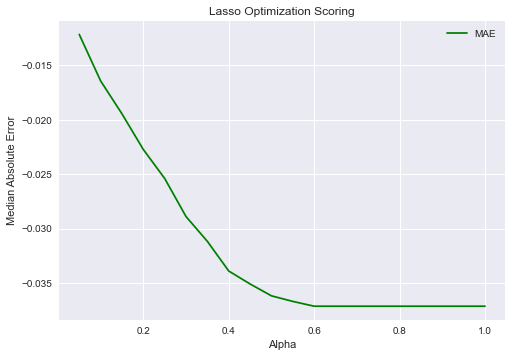

In [32]:
Lasso_model=Lasso(alpha=alphas,fit_intercept=True)

Cross_6=GridSearchCV(Lasso_model,alphas,scoring="neg_median_absolute_error",cv=nb_folds,return_train_score=False)
Cross_6.fit(X,y)

#Defining the DataFrame with all the results, in this case for the Lasso
lasso_rmae_df=pd.DataFrame(Cross_6.cv_results_)

results_rmae_Lass_2=lasso_rmae_df[["param_alpha","mean_test_score"]]
results_rmae_Lass_2.set_index("param_alpha",inplace=True)
sr_rmae_lasso_2=pd.Series(results_rmae_Lass_2.mean_test_score)

#Plotting the results 
fig, ax = plt.subplots()
ax.plot(sr_rmae_lasso_2,color='green',label="MAE")
ax.set_title("Lasso Optimization Scoring")
ax.set_xlabel('Alpha')
ax.set_ylabel('Median Absolute Error')
ax.legend();

In [33]:
print("For the median absolute error the optimal value of alpha is","",Cross_6.best_params_)
print("The score if this alpha is used is","",Cross_6.best_score_)

For the median absolute error the optimal value of alpha is  {'alpha': 0.05}
The score if this alpha is used is  -0.012159855576286061


# Random Forest

1   -0.012115
2   -0.011962
3   -0.011719
Name: 100, dtype: float64


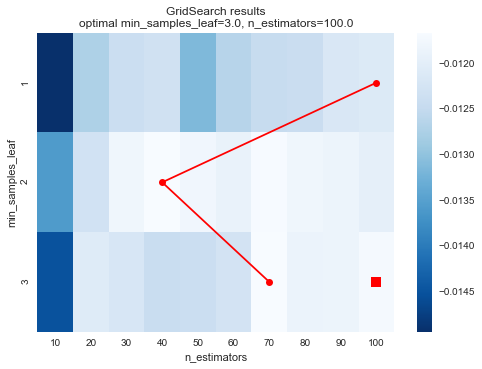

In [34]:
Cross_7=GridSearchCV(mdl_rdm,param_grid=param_grid,scoring="neg_median_absolute_error",
                     cv=nb_folds,return_train_score=False,
                    n_jobs=-1)
Cross_7.fit(X,y);

rdm_rmae_df=pd.DataFrame(Cross_7.cv_results_)
df_errors1 = pd.DataFrame(index=rdm_rmae_df.param_min_samples_leaf.unique(), columns=rdm_rmae_df.param_n_estimators.unique())
df_errors1=df_errors1.fillna(0)

for i in range(len(rdm_rmae_df)):
    j=rdm_rmae_df.param_n_estimators[i]
    k=rdm_rmae_df.param_min_samples_leaf[i]
    df_errors1.loc[k,j]=rdm_rmae_df.mean_test_score[i]
    
#Plotting the heatmap  
plot = plot_heatmap(df_errors1,ylabel='min_samples_leaf', xlabel='n_estimators') 


I do keep the same cross validator as before, Kfold with 5 different folds

# d)


A forest with 40 different decision trees and a min of 2 samples at each leaf yields the best result among the regressions conducted in this case. In absolute terms, the metric chosen to evaluate the performance of the model outperforms the regularizations: Lasso by (0.00064) and Ridge (0.00185).

# e)


Both heatmaps are significantly different. The first one I plotted seems to perform better the bigger the forest grows in number of trees, and the greater the expansion that each of the trees achieves (in the lower layer of the heatmap). Furthermore, the fit is also considerably better for the first case. The latter, in contrast, seems to perform better at middle stages. 

The differences in size and "width" have something to do with dimensions of the dataset considered at each point. The more information availabe in the datasets, the more dynamics of the data the random forest has to capture, and of course, the more resources (parameters and computing power) the algorithm needs for the optimisation. However, this also seems to boost the model's performance in learning from data structures in order to yield more accurate predictions.

# Bonus question [5P]
Use any method you learned throughout the course and try to beat the best `RandomForestRegressor` from the previous question. Which model did you decide for and what motivated your choice? How much better does your model do in forecasting than the best `RandomForestRegressor`?

**Note:** Bonus points will only be awarded if the forecasting results are **convincingly** better. 

<div style="color:blue; border-bottom: 7px solid rgba(0,0,255,.3); line-height:36pt; font-size:185.7%; font-weight:bold; padding-left:.3em;">Answer</div>

<div style="font-size:250%; line-height:120%; padding: 50px 0 20px 0; border-bottom: 4px solid black;">Part II: A critical view on machine learning</div>

# Question 6 [10P]
Different from grid search, parallelization can significantly speed up gradient descent optimization methods. However, a computer with four cores doesn’t necessarily lead to four times the speed of a single core.

Do you agree with this statement? Provide your arguments and relate it to the grid search you did for `RandomForestRegressor` in Question 4.

<span style='color:crimson; font-weight: bold'>Word limit = 200 words. </span>

<div style="color:blue; border-bottom: 7px solid rgba(0,0,255,.3); line-height:36pt; font-size:185.7%; font-weight:bold; padding-left:.3em;">Answer</div>

According to what I have read, increasing cores of the CPU does not necessarily lead to increasing the speed of running multiple programs simoultaneously, since the greater the number of cores, the more communication channels within the cores of the CPU are needed, which in turn reduces also the computing speed. However, in my case, when computing the grid search, if I commited all of the cores (2) of my computer to run parallel jobs for the computations the computing time was around 02:14 mins, whereas If I allowed for the default option (1) the computation time raised up to 06:10. This basically means that commiting all of the cores of the CPU for increased significantly the performance, however, at the expense of loosing speed in the computer, while computations are taking place, if you would like to perform any other task in the meantime.


# Question 7 [10P]
Splits in a decision tree are based on reducing impurity. Name and explain one of the three impurity measures we discussed. How can splitting the sample reduce the overall impurity? How did this influence your calculations for `RandomForestRegressor` in Question 4?

<span style='color:crimson; font-weight: bold'>Word limit = 200 words. </span>

<div style="color:blue; border-bottom: 7px solid rgba(0,0,255,.3); line-height:36pt; font-size:185.7%; font-weight:bold; padding-left:.3em;">Answer</div>

The decision trees that form the random forests are built based on simple questions based on the structure of the data at hand. The best questions are the ones that reduce the uncertainty the most. Gini impurity enables us to quantify how much uncertainty there is at each of the nodes that build the trees. This measurement ranges between 0 and 1. Where lower values entail less uncertainty or impurity and higher readings establish a higher uncertainty or impurity. In other words, it quantifies our chances of being incorrect if you randomly assign a label or predict a certain numeric output to an example in the same set. 

To this end, I didn´t limit the max_depth of the trees conforming the random forest since that would enable them to expand hen until all leaves are pure or until "all leaves contain less than min_samples_split samples". In normal decision trees, overfitting constitutes a serious problems, therefore, the expansion of the trees must be limited, however, from what I´ve read RdForest does not overfit as we run more trees. Thus, I understood that the more pure th outcomes of each tree, the better.


# Question 8 [10P]
What do we optimize in a regression problem versus a classification problem? Would it be wrong to calculate the `RandomForestClassifier` in Question 4? Argue why it could be useful or why not.

<span style='color:crimson; font-weight: bold'>Word limit = 200 words. </span>

<div style="color:blue; border-bottom: 7px solid rgba(0,0,255,.3); line-height:36pt; font-size:185.7%; font-weight:bold; padding-left:.3em;">Answer</div>

Regression problems like the ones performed optimize the loss function, usually measured by the MSE, to minimize such error between the true numeric/continuous values of the target variables (PDF) and the predicted continuous/numeric output. In classification problems however the role of the algorithm is to serve as mapping function to identify the specific dynamics of the data and answer yes/no questions in order to relate them with certain discrete variables and predict a certain label, so the optimization is performed by increasing the accuracy of the classifications through standard classification errors (error rates).

The RandomForest regressor may be used to predict both, numeric and categorical data, the main difference is that for numeric data at each node of the trees the value would be the average response variable for all observations in that node whereas, for classification problems the predicted class is the most common class. Furthermore, since regression is not based just in predicting the value of the target variable from the predictors used, but also in understanding the relationships between the predictors and such targets, random forests are better at capturing the dynamics/ structure of the data at hand.  
